In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/full_dataset_with_alternate_indexing.csv')
age = pd.read_csv('/content/user_dictionary_per_user_cycle (1).csv')

In [ ]:
# GOAL: line plots of LH E3G and PDG hormone levels throughout cycle length, by age
df=df.drop(columns=['Unnamed: 0'])
df.head(n=3)

,id,hub_id,complete_time,test_wand_type,biomarker,con_value,group,cycle_day,cycle_index,cycle_length,cycle_status,cycle_day_bw,max_LH_day,max_LH_day_bw,cycle_day_from_LH_spike
0,584470,U2921516,2021-11-05 21:46:10,9,9,15.01,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0
1,584471,U2921516,2021-11-05 22:03:05,3,1,1.99,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0
2,584472,U2921516,2021-11-05 22:03:05,3,3,111.12,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0


In [ ]:
df.head(n=3)
df['biomarker'].value_counts()

,count
biomarker,
1,365440
3,350012
9,235259
16,16651
14,201
2,66


In [ ]:
# lh 1, pdg 9, e3g 3
def biomarker(val):
    if val == 1:
      return 'LH'
    elif val == 9:
      return 'PDG'
    elif val == 3:
      return 'E3G'
    elif val == 16:
      return 'FSH'
    elif val == 14:
      return 'HCG Qualitative'
    elif val == 2:
      return "HCG"
    else:
      return np.NaN

In [ ]:
df['hormone'] = df['biomarker'].apply(biomarker)
df.head()

,id,hub_id,complete_time,test_wand_type,biomarker,con_value,group,cycle_day,cycle_index,cycle_length,cycle_status,cycle_day_bw,max_LH_day,max_LH_day_bw,cycle_day_from_LH_spike,hormone
0,584470,U2921516,2021-11-05 21:46:10,9,9,15.01,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0,PDG
1,584471,U2921516,2021-11-05 22:03:05,3,1,1.99,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0,LH
2,584472,U2921516,2021-11-05 22:03:05,3,3,111.12,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0,E3G
3,584473,U2921516,2021-11-06 21:38:41,3,1,3.33,Baseline,29.0,37.0,31,1,-2.0,29.0,-2.0,0.0,LH
4,584474,U2921516,2021-11-06 21:38:41,3,3,207.98,Baseline,29.0,37.0,31,1,-2.0,29.0,-2.0,0.0,E3G


In [ ]:
df['complete_time'] = df['complete_time'].str[:10]
df.head(n=3)

,id,hub_id,complete_time,test_wand_type,biomarker,con_value,group,cycle_day,cycle_index,cycle_length,cycle_status,cycle_day_bw,max_LH_day,max_LH_day_bw,cycle_day_from_LH_spike,hormone
0,584470,U2921516,2021-11-05,9,9,15.01,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0,PDG
1,584471,U2921516,2021-11-05,3,1,1.99,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0,LH
2,584472,U2921516,2021-11-05,3,3,111.12,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0,E3G


In [ ]:
age.head()
age=age.drop(columns=['cycle_index','age_in_months'])

In [ ]:
age = age.drop_duplicates(subset=['hub_id'])
age.head()

,hub_id,date_of_birth
0,U2921516,01/1986
52,U2ABB1615570212,10/1981
90,U2ABC3515570773,03/1985
105,U2ABEA415572434,12/1991
144,U2AD07F15606021,01/1984


In [ ]:
df = pd.merge(df, age, on='hub_id', how='left')
df.head()

,id,hub_id,complete_time,test_wand_type,biomarker,con_value,group,cycle_day,cycle_index,cycle_length,cycle_status,cycle_day_bw,max_LH_day,max_LH_day_bw,cycle_day_from_LH_spike,hormone,date_of_birth
0,584470,U2921516,2021-11-05,9,9,15.01,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0,PDG,01/1986
1,584471,U2921516,2021-11-05,3,1,1.99,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0,LH,01/1986
2,584472,U2921516,2021-11-05,3,3,111.12,Baseline,28.0,37.0,31,1,-3.0,29.0,-2.0,-1.0,E3G,01/1986
3,584473,U2921516,2021-11-06,3,1,3.33,Baseline,29.0,37.0,31,1,-2.0,29.0,-2.0,0.0,LH,01/1986
4,584474,U2921516,2021-11-06,3,3,207.98,Baseline,29.0,37.0,31,1,-2.0,29.0,-2.0,0.0,E3G,01/1986


In [ ]:
#df = df.drop(columns=["date_of_birth_y","date_of_birth_x"])

In [ ]:
from datetime import datetime
def calculate_age(dob_str, complete_time_str):
    try:
        dob_parts = dob_str.split('/')
        dob_month = int(dob_parts[0])
        dob_year = int(dob_parts[1])
        complete_time_obj = datetime.strptime(complete_time_str, '%Y-%m-%d')
        complete_time_year = complete_time_obj.year
        complete_time_month = complete_time_obj.month
        age_months = (complete_time_year - dob_year) * 12 + (complete_time_month - dob_month)
        age_years = age_months / 12
        return age_months, age_years
    except (ValueError, IndexError):
        return None, None
df['age_in_months'], df['age_in_years'] = zip(*df.apply(lambda row: calculate_age(row['date_of_birth'], row['complete_time']), axis=1))

In [ ]:
def age_group(age):
  if age>=40:
    return "Over 40"
  else:
    return "Under 40"

In [ ]:
def age_group_45(age):
  if age>=45:
    return "Over 45"
  else:
    return "Under 45"
df['45 Age Group'] = df['age_in_years'].apply(age_group_45)

In [ ]:
df['45 Age Group'].value_counts()

,count
45 Age Group,
Under 45,915911
Over 45,51718


In [ ]:
df['Age Group'].value_counts()

KeyError: 'Age Group'

In [ ]:
print(100*(74658/(74658+269394)))

21.69962680059991


In [ ]:
print(100*(14972/(14972+329080)))

4.351667771150872


In [ ]:
df['Age Group'] = df['age_in_years'].apply(age_group)
df.head()

In [ ]:
LH = df[df['hormone']=='LH']
LH.head()
LH_pcos = LH[LH['group']=='PCOS']
LH_B = LH[LH['group']=='Baseline']

In [ ]:
df['group'].value_counts()

In [ ]:
E3G = df[df['hormone']=='E3G']
E3G_pcos = E3G[E3G['group']=='PCOS']
E3G_B = E3G[E3G['group']=='Baseline']

In [ ]:
PDG = df[df['hormone']=='PDG']
PDG_pcos = PDG[PDG['group']=='PCOS']
PDG_B = PDG[PDG['group']=='Baseline']

In [ ]:
df['cycle_day'].value_counts()

Text(0, 0.5, 'Luteinizing Hormone Level')

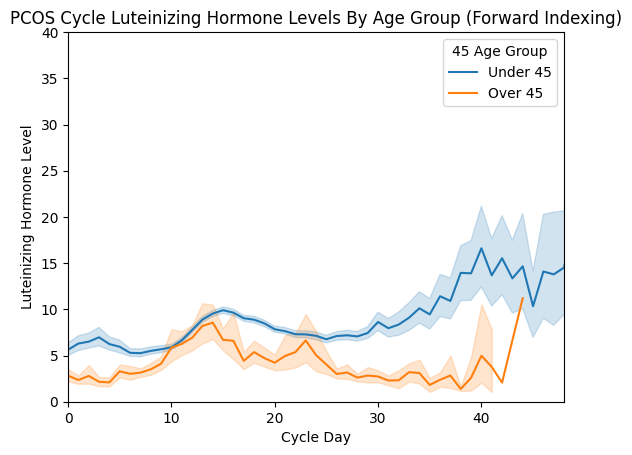

In [ ]:
sns.lineplot(data=LH_pcos,x='cycle_day',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Luteinizing Hormone Levels By Age Group (Forward Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(0,48)
plt.ylim(0,40)
plt.ylabel("Luteinizing Hormone Level")

Text(0, 0.5, 'Luteinizing Hormone Level')

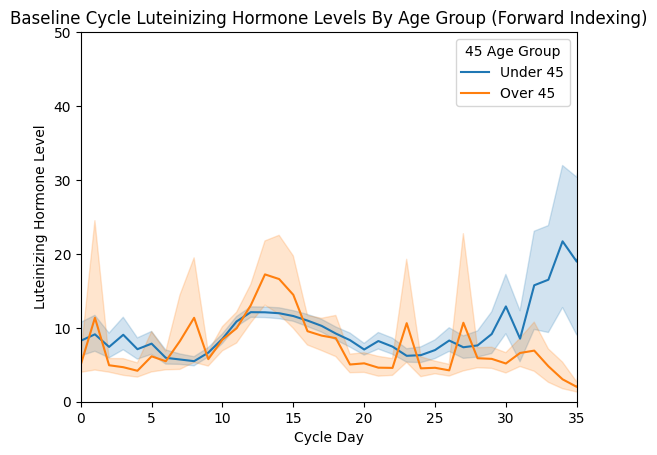

In [ ]:
sns.lineplot(data=LH_B,x='cycle_day',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Luteinizing Hormone Levels By Age Group (Forward Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(0,35)
plt.ylim(0,50)
plt.ylabel("Luteinizing Hormone Level")

Text(0, 0.5, 'Estrogen Level')

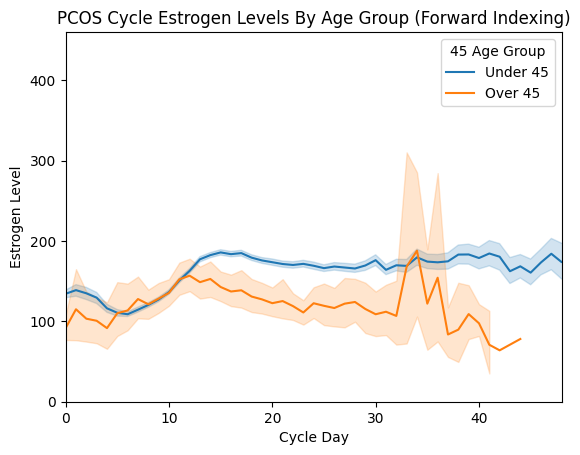

In [ ]:
sns.lineplot(data=E3G_pcos,x='cycle_day',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Estrogen Levels By Age Group (Forward Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(0,48)
plt.ylim(0,460)
plt.ylabel("Estrogen Level")

Text(0, 0.5, 'Estrogen Level')

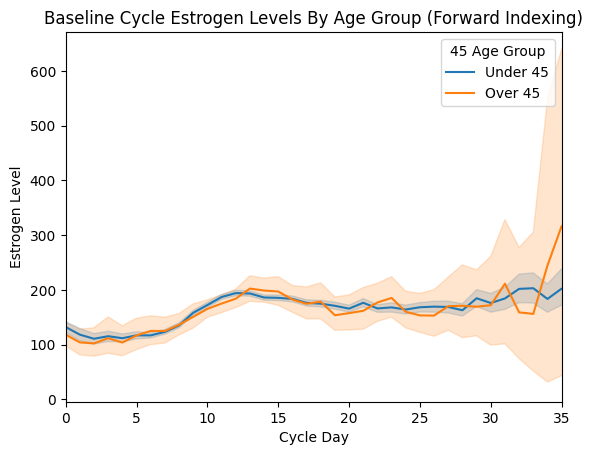

In [ ]:
sns.lineplot(data=E3G_B,x='cycle_day',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Estrogen Levels By Age Group (Forward Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(0,35)
#plt.ylim(0,500)
plt.ylabel("Estrogen Level")

Text(0, 0.5, 'Progesterone Level')

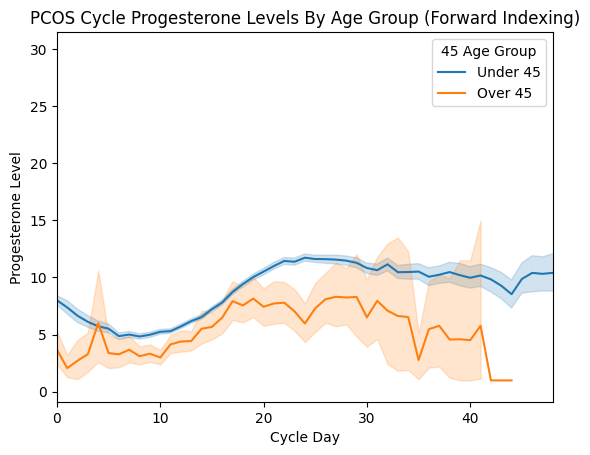

In [ ]:
sns.lineplot(data=PDG_pcos,x='cycle_day',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Progesterone Levels By Age Group (Forward Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(0,48)
#plt.ylim(0,460)
plt.ylabel("Progesterone Level")

Text(0, 0.5, 'Progesterone Level')

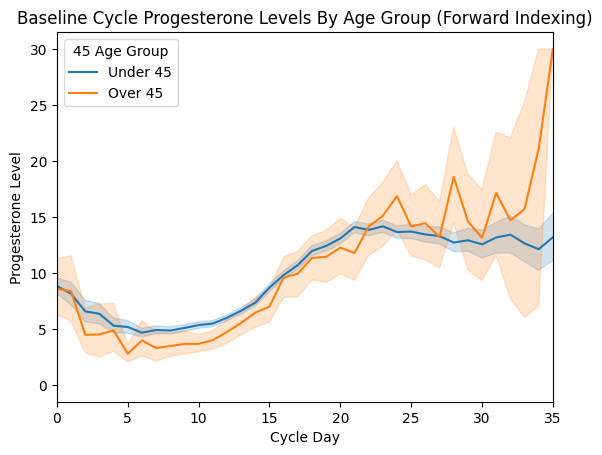

In [ ]:
sns.lineplot(data=PDG_B,x='cycle_day',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Progesterone Levels By Age Group (Forward Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(0,35)
#plt.ylim(0,320)
plt.ylabel("Progesterone Level")

In [ ]:
LH_pcos.head()

Text(0, 0.5, 'Luteinizing Hormone Level')

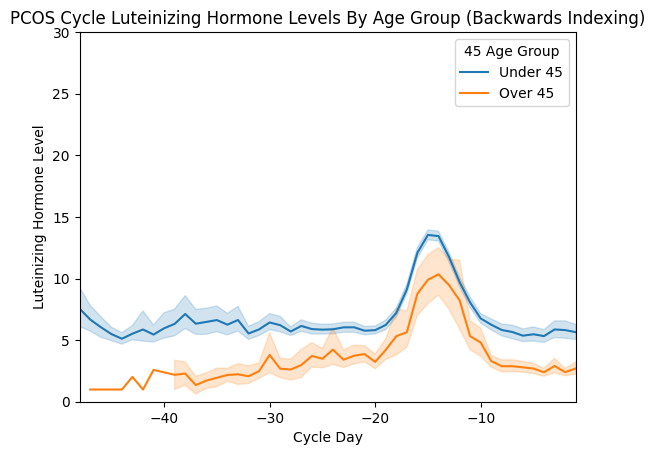

In [ ]:
sns.lineplot(data=LH_pcos,x='cycle_day_bw',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Luteinizing Hormone Levels By Age Group (Backwards Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-48,-1)
plt.ylim(0,30)
plt.ylabel("Luteinizing Hormone Level")

Text(0, 0.5, 'Luteinizing Hormone Level')

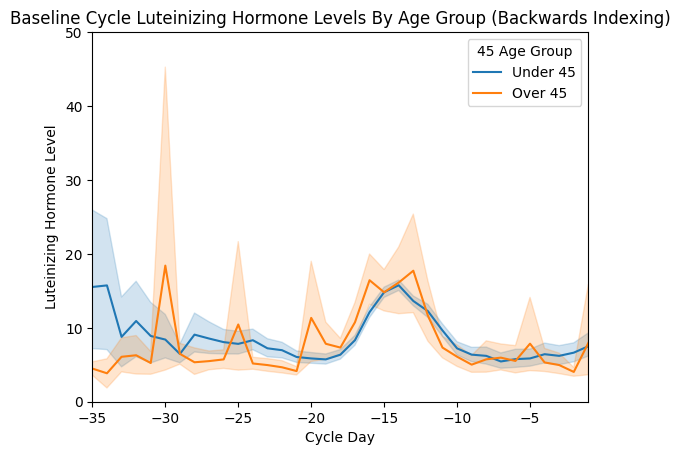

In [ ]:
sns.lineplot(data=LH_B,x='cycle_day_bw',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Luteinizing Hormone Levels By Age Group (Backwards Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-35,-1)
plt.ylim(0,50)
plt.ylabel("Luteinizing Hormone Level")

Text(0, 0.5, 'Estrogen Level')

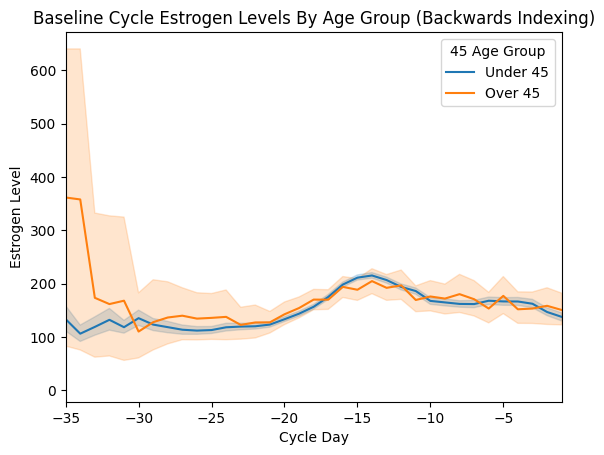

In [ ]:
sns.lineplot(data=E3G_B,x='cycle_day_bw',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Estrogen Levels By Age Group (Backwards Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-35,-1)

plt.ylabel("Estrogen Level")

Text(0, 0.5, 'Estrogen Level')

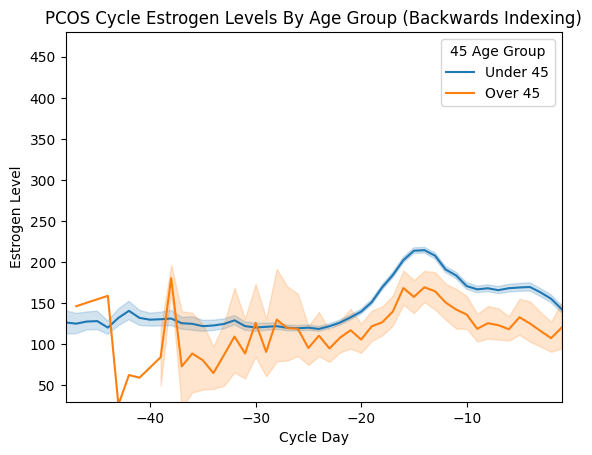

In [ ]:
sns.lineplot(data=E3G_pcos,x='cycle_day_bw',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Estrogen Levels By Age Group (Backwards Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-48,-1)
plt.ylim(30,480)
plt.ylabel("Estrogen Level")

Text(0, 0.5, 'Progesterone Level')

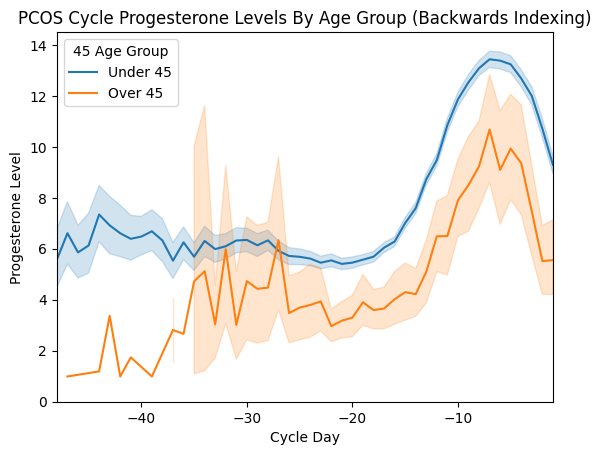

In [ ]:
sns.lineplot(data=PDG_pcos,x='cycle_day_bw',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Progesterone Levels By Age Group (Backwards Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-48,-1)
plt.ylim(0,14.5)
plt.ylabel("Progesterone Level")

Text(0, 0.5, 'Progesterone Level')

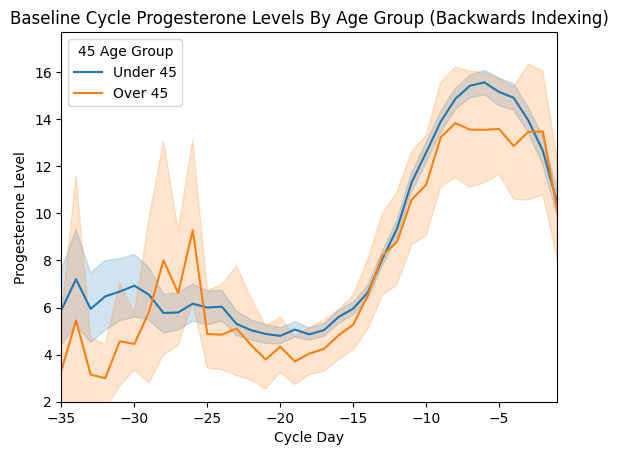

In [ ]:
sns.lineplot(data=PDG_B,x='cycle_day_bw',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Progesterone Levels By Age Group (Backwards Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-35,-1)
plt.ylim(2,17.7)
plt.ylabel("Progesterone Level")

In [ ]:
PDG_B.head()

In [ ]:
PDG_B['max_LH_day_bw'].value_counts()

Text(0, 0.5, 'Progesterone Level')

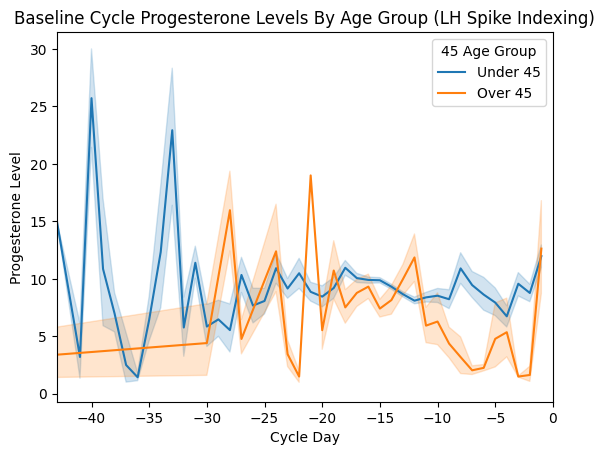

In [ ]:
sns.lineplot(data=PDG_B,x='max_LH_day_bw',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Progesterone Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-43,0)
#plt.ylim(0,30)
plt.ylabel("Progesterone Level")

Text(0, 0.5, 'Progesterone Level')

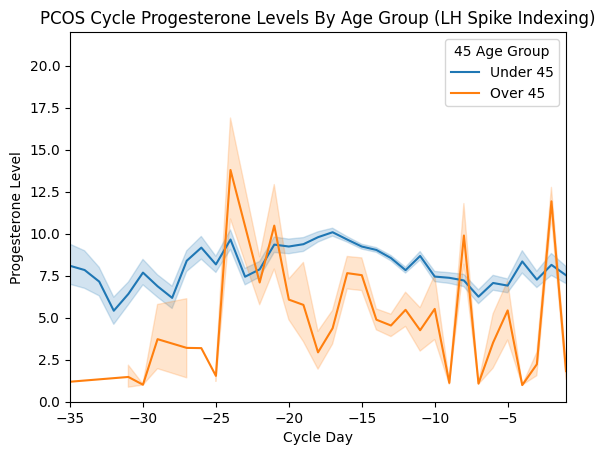

In [ ]:
sns.lineplot(data=PDG_pcos,x='max_LH_day_bw',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Progesterone Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-35,-1)
plt.ylim(0,22)
plt.ylabel("Progesterone Level")

Text(0, 0.5, 'Estrogen Level')

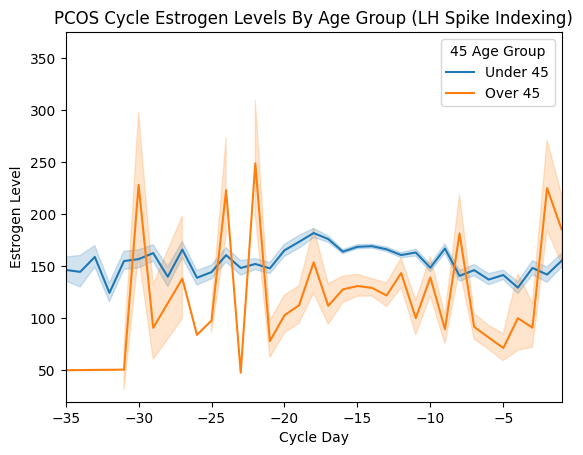

In [ ]:
sns.lineplot(data=E3G_pcos,x='max_LH_day_bw',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Estrogen Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-35,-1)
plt.ylim(20,375)
plt.ylabel("Estrogen Level")

Text(0, 0.5, 'Estrogen Level')

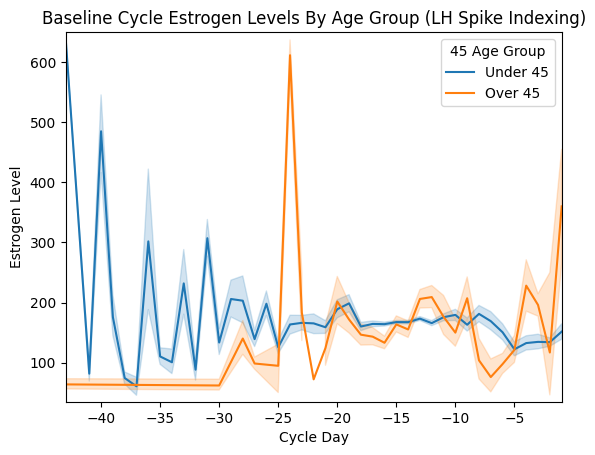

In [ ]:
sns.lineplot(data=E3G_B,x='max_LH_day_bw',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Estrogen Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-43,-1)
plt.ylim(35,650)
plt.ylabel("Estrogen Level")

Text(0, 0.5, 'Luteinizing Hormone Level')

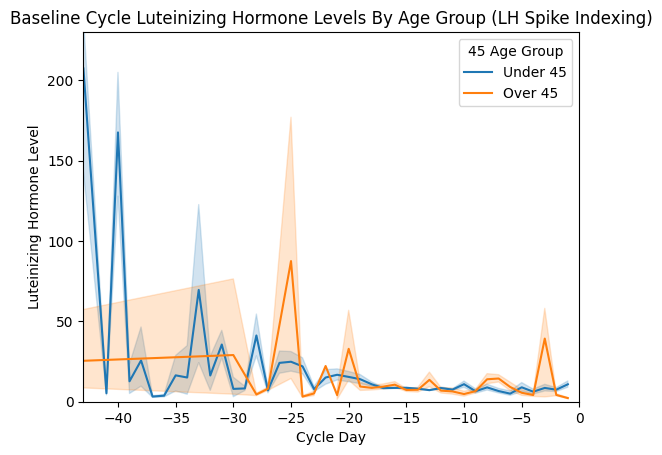

In [ ]:
sns.lineplot(data=LH_B,x='max_LH_day_bw',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Luteinizing Hormone Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-43,0)
plt.ylim(0,230)
plt.ylabel("Luteinizing Hormone Level")

In [ ]:
sns.lineplot(data=LH_pcos,x='max_LH_day_bw',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Luteinizing Hormone Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-50,0)
plt.ylim(0,55)
plt.ylabel("Luteinizing Hormone Level")

Text(0, 0.5, 'Luteinizing Hormone Level')

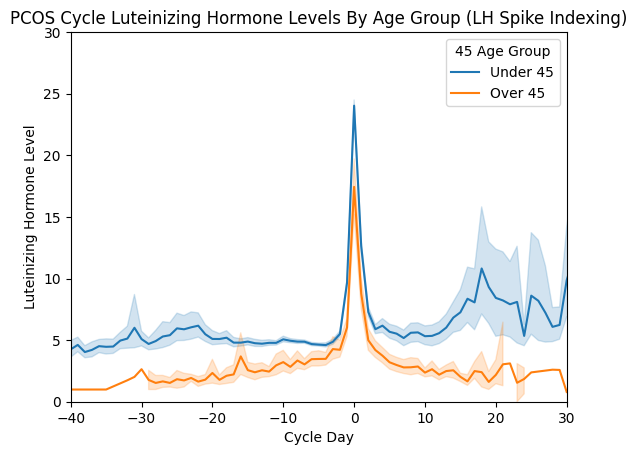

In [ ]:
sns.lineplot(data=LH_pcos,x='cycle_day_from_LH_spike',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Luteinizing Hormone Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-40,30)
plt.ylim(0,30)
plt.ylabel("Luteinizing Hormone Level")

In [ ]:
LH_pcos.groupby('45 Age Group')['cycle_day_from_LH_spike'].describe()

,count,mean,std,min,25%,50%,75%,max
45 Age Group,,,,,,,,
Over 45,2397.0,-0.941594,8.252329,-40.0,-5.0,0.0,4.0,30.0
Under 45,155489.0,-2.371004,11.404942,-148.0,-7.0,-1.0,2.0,163.0


Text(0, 0.5, 'Luteinizing Hormone Level')

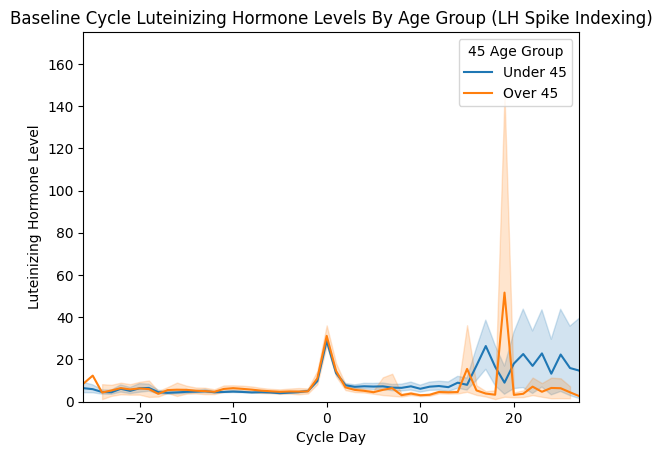

In [ ]:
sns.lineplot(data=LH_B,x='cycle_day_from_LH_spike',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Luteinizing Hormone Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-26,27)
plt.ylim(0,175)
plt.ylabel("Luteinizing Hormone Level")

In [ ]:
LH_B.groupby('45 Age Group')['cycle_day_from_LH_spike'].describe()

,count,mean,std,min,25%,50%,75%,max
45 Age Group,,,,,,,,
Over 45,2832.0,0.122175,7.252564,-26.0,-4.0,0.0,4.0,27.0
Under 45,56131.0,-0.769486,7.534963,-103.0,-4.0,0.0,3.0,64.0


Text(0, 0.5, 'Progesterone Level')

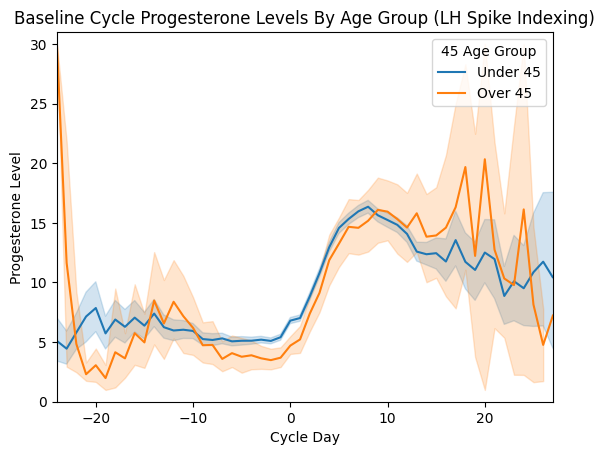

In [ ]:
sns.lineplot(data=PDG_B,x='cycle_day_from_LH_spike',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Progesterone Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-24,27)
plt.ylim(0,31)
plt.ylabel("Progesterone Level")

In [ ]:
PDG_B.groupby('45 Age Group')['cycle_day_from_LH_spike'].describe()

,count,mean,std,min,25%,50%,75%,max
45 Age Group,,,,,,,,
Over 45,2145.0,0.908159,7.687425,-24.0,-3.0,0.0,6.0,27.0
Under 45,36823.0,0.930886,7.942089,-103.0,-3.0,1.0,6.0,64.0


Text(0, 0.5, 'Progesterone Level')

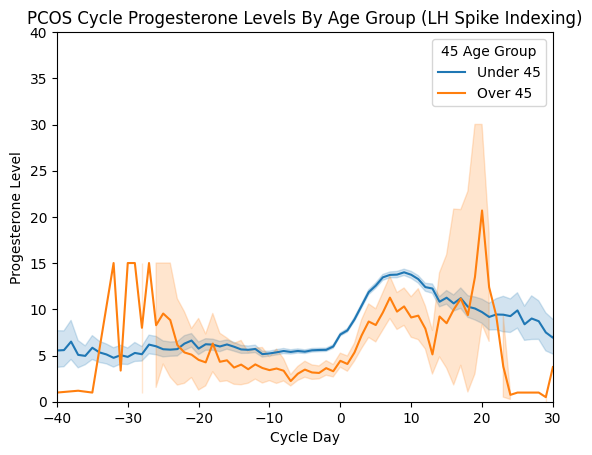

In [ ]:
sns.lineplot(data=PDG_pcos,x='cycle_day_from_LH_spike',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Progesterone Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-40,30)
plt.ylim(0,40)
plt.ylabel("Progesterone Level")

In [ ]:
PDG_pcos.groupby('45 Age Group')['cycle_day_from_LH_spike'].describe()

,count,mean,std,min,25%,50%,75%,max
45 Age Group,,,,,,,,
Over 45,2030.0,0.054187,8.120399,-40.0,-4.0,0.0,5.0,30.0
Under 45,94894.0,-0.105328,11.100378,-144.0,-4.0,1.0,6.0,163.0


Text(0, 0.5, 'Estrogen Level')

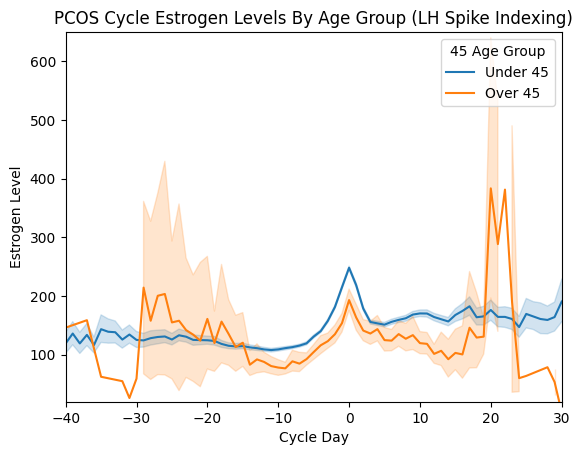

In [ ]:
sns.lineplot(data=E3G_pcos,x='cycle_day_from_LH_spike',y='con_value',hue='45 Age Group')
plt.title("PCOS Cycle Estrogen Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-40,30)
plt.ylim(20,650)
plt.ylabel("Estrogen Level")

In [ ]:
E3G_pcos.groupby('45 Age Group')['cycle_day_from_LH_spike'].describe()

,count,mean,std,min,25%,50%,75%,max
45 Age Group,,,,,,,,
Over 45,2373.0,-0.909397,8.239652,-40.0,-5.0,0.0,4.0,30.0
Under 45,148041.0,-2.346870,11.260600,-148.0,-7.0,-1.0,3.0,163.0


In [ ]:
sns.lineplot(data=E3G_B,x='cycle_day_from_LH_spike',y='con_value',hue='45 Age Group')
plt.title("Baseline Cycle Estrogen Levels By Age Group (LH Spike Indexing)")
plt.xlabel("Cycle Day")
plt.xlim(-26,27)
plt.ylim(20,650)
plt.ylabel("Estrogen Level")

In [ ]:
E3G_B.groupby('45 Age Group')['cycle_day_from_LH_spike'].describe()

,count,mean,std,min,25%,50%,75%,max
45 Age Group,,,,,,,,
Over 45,2786.0,0.131730,7.286215,-26.0,-4.0,0.0,4.0,27.0
Under 45,53935.0,-0.752276,7.573843,-103.0,-4.0,0.0,3.0,64.0
